# Can we predict recessions given publicly available macroeconomic data?

In [284]:
# Project Inspiration 
# https://medium.com/@romanm111987/predicting-stock-market-crashes-with-statistical-machine-learning-techniques-and-neural-networks-b756d9b48497
# https://github.com/roman807/Predicting-Stock-Market-Crashes

# Clean Data

In [75]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Align Data

In [76]:
# First batch of data

import pandas as pd

SP500 = pd.read_csv('Data/SP500.csv')
T10T3 = pd.read_csv('Data/103.csv')
uRate = pd.read_csv('Data/Unrate.csv')
nfci = pd.read_csv('Data/nfci.csv')
GDP = pd.read_csv('Data/GDP.csv')

# Second batch of data
USDindex = pd.read_csv('Data/USDIndex.csv')
ManufacturingConfidence = pd.read_csv('Data/ManufacturingConfidence.csv')
HousePriceIndex = pd.read_csv('Data/HousePriceIndex.csv')
ConsumerSentiment = pd.read_csv('Data/ConsumerSentiment.csv')
PeopleOutputPerHour = pd.read_csv('Data/PeopleOutputPerHour.csv')
GS10 = pd.read_csv('Data/GS10.csv')
FEDFUNDS = pd.read_csv('Data/FEDFUNDS.csv')
USNIM = pd.read_csv('Data/USNIM.csv')
govtToGDP = pd.read_csv('Data/govtToGDP.csv')
CorporateProfits = pd.read_csv('Data/CorporateProfits.csv')
VIX = pd.read_csv('Data/VIX.csv')

# Annoying to integrate all these right now
#highYield = pd.read_csv('Data/highYield.csv')
#highYield = highYield.iloc[1:]
#BBB = pd.read_csv('Data/BBB.csv')
#BBB = BBB.iloc[1:]
#IG = pd.read_csv('Data/IG.csv')
#IG = IG.iloc[1:]

# Add these
# https://www.quandl.com/data/MULTPL/SHILLER_PE_RATIO_MONTH-Shiller-PE-Ratio-by-Month
# https://fred.stlouisfed.org/series/USREC
# https://fred.stlouisfed.org/series/M1
# https://fred.stlouisfed.org/series/M2
# https://fred.stlouisfed.org/series/MABMM301USM189S
# https://research.stlouisfed.org/
# https://fred.stlouisfed.org/series/CSUSHPISA
# https://fred.stlouisfed.org/series/USSLIND
# Add one year and three year performance to S&P 
# https://fred.stlouisfed.org/series/TEDRATE
# https://fred.stlouisfed.org/series/CUSR0000SAC
#  https://fred.stlouisfed.org/series/DEXJPUS
# https://fred.stlouisfed.org/series/PERMIT
# https://fred.stlouisfed.org/series/T10YFFM
# https://www.quandl.com/data/FRED/NAPMPI-ISM-Manufacturing-Production-Index
# https://fred.stlouisfed.org/series/PAYEMS
# https://www.quandl.com/data/FRED/NAPM-ISM-Manufacturing-PMI-Composite-Index

In [77]:
ourData = [SP500, T10T3, uRate, nfci, GDP, USDindex,
          ManufacturingConfidence, HousePriceIndex, ConsumerSentiment,
          PeopleOutputPerHour, GS10, FEDFUNDS, USNIM, govtToGDP, CorporateProfits, VIX]#, highYield, BBB, IG]
dataName = ['SP500', 'T10T3', 'uRate', 'nfci', 'GDP', 'USDIndex',
           'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
          'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP', 'CorporateProfits', 'VIX']#, 'highYield', 'BBB', 'IG']

In [78]:
maxData = 0
maxDataType = 'xyz'
maxYear = 0
maxYearType = 'xyz'

for i in range(0, len(ourData)):
    start = '/'
    end = '/'
    
    date1 = ourData[i]['Date'][0]
    
    thisYear = int(date1[-4:])
    print(thisYear, dataName[i])
    
    if thisYear > maxYear:
        maxYear = thisYear
        maxYearType = dataName[i]
    
    date2 = ourData[i]['Date'][1]
    #print(date2)
    #print('Month', date2.split('/')[0])
    #print((date2.split(start))[1].split(end)[0])
    print(dataName[i], ":", int(date2.split('/')[0]) - int(date1.split('/')[0]))
    if (int(date2.split('/')[0]) - int(date1.split('/')[0])) > maxData:
        maxData = int(date2.split('/')[0]) - int(date1.split('/')[0])
        maxDataType = dataName[i]
print(maxDataType, "data reporting is", maxData, "months")
print(maxYear, "is the last year in the data, and it is from", maxYearType)

1980 SP500
SP500 : 0
1982 T10T3
T10T3 : 0
1948 uRate
uRate : 1
1971 nfci
nfci : 0
1947 GDP
GDP : 3
1973 USDIndex
USDIndex : 0
1960 ManufacturingConfidence
ManufacturingConfidence : 1
1975 HousePriceIndex
HousePriceIndex : 3
1952 ConsumerSentiment
ConsumerSentiment : 1
1987 PeopleOutputPerHour
PeopleOutputPerHour : 3
1953 GS10
GS10 : 1
1954 FEDFUNDS
FEDFUNDS : 1
1984 USNIM
USNIM : 3
1947 govtToGDP
govtToGDP : 3
1947 CorporateProfits
CorporateProfits : 3
1990 VIX
VIX : 0
GDP data reporting is 3 months
1990 is the last year in the data, and it is from VIX


In [79]:
# Create year column for all data

for i in range(0, len(ourData)):
    # Why can't we get year to match up to the column length
    yearList = [0] * len(ourData[i])
    #print(len(yearList))
    for j in range(0, len(yearList)):        
        dateValue = ourData[i]['Date'][j]        
        thisDate = int(dateValue[-4:])
        yearList[j] = thisDate
    ourData[i]['Year'] = yearList

In [80]:
# Filter data based on the max year

for i in range(0, len(ourData)):
    ourData[i]['Year'].astype(float)
    ourData[i]['Year'] = ourData[i][ourData[i]['Year'] >= maxYear]  

In [81]:
# Drop nulls 
for i in range(0, len(ourData)):
    ourData[i] = ourData[i].dropna()

In [82]:
# Check data outputs
for i in range(0, len(ourData)):
    print(ourData[i].head())

          Date  SP500      Year
2449  1/2/1990 359.69  1/2/1990
2450  1/3/1990 358.76  1/3/1990
2451  1/4/1990 355.67  1/4/1990
2452  1/5/1990 352.20  1/5/1990
2453  1/8/1990 353.79  1/8/1990
          Date  T10Y3M      Year
2085  1/1/1990    0.00  1/1/1990
2086  1/2/1990    0.11  1/2/1990
2087  1/3/1990    0.10  1/3/1990
2088  1/4/1990    0.14  1/4/1990
2089  1/5/1990    0.20  1/5/1990
         Date  UNRATE      Year
504  1/1/1990    5.40  1/1/1990
505  2/1/1990    5.30  2/1/1990
506  3/1/1990    5.20  3/1/1990
507  4/1/1990    5.40  4/1/1990
508  5/1/1990    5.40  5/1/1990
          Date  NFCI       Year
991   1/5/1990 -0.10   1/5/1990
992  1/12/1990 -0.09  1/12/1990
993  1/19/1990 -0.08  1/19/1990
994  1/26/1990 -0.07  1/26/1990
995   2/2/1990 -0.08   2/2/1990
          Date     GDP       Year
172   1/1/1990 5872.70   1/1/1990
173   4/1/1990 5960.03   4/1/1990
174   7/1/1990 6015.12   7/1/1990
175  10/1/1990 6004.73  10/1/1990
176   1/1/1991 6035.18   1/1/1991
          Date USDinde

In [83]:
# We now need to filter out all data before 1982

SP500 = ourData[0]
T10T3 = ourData[1]
uRate = ourData[2]
nfci = ourData[3]
GDP = ourData[4]
USDindex = ourData[5]
ManufacturingConfidence = ourData[6]
HousePriceIndex = ourData[7]
ConsumerSentiment = ourData[8]           
PeopleOutputPerHour = ourData[9]
GS10 = ourData[10]
FEDFUNDS = ourData[11]
USNIM = ourData[12]
govtToGDP = ourData[13]
CorporateProfits = ourData[14]
VIX = ourData[15]
#highYield = ourData[16]
#BBB = ourData[17]
#IG = ourData[18]

In [84]:
ourData = [SP500, T10T3, uRate, nfci, GDP, USDindex,
          ManufacturingConfidence, HousePriceIndex, ConsumerSentiment,
          PeopleOutputPerHour, GS10, FEDFUNDS, USNIM, govtToGDP, CorporateProfits, VIX]#, highYield, BBB, IG]

dataName = ['SP500', 'T10T3', 'uRate', 'nfci', 'GDP', 'USDIndex',
           'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
          'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP', 'CorporateProfits', 'VIX']#, 'highYield', 'BBB', 'IG']

smallestData = len(ourData[0])
smallestDataName = dataName[0]

for i in range(0, len(ourData)):
    print(len(ourData[i]), dataName[i])
    if len(ourData[i]) < smallestData:
        smallestData = len(ourData[i]) 
        smallestDataName = dataName[i]
print(smallestData, smallestDataName)

7384 SP500
7647 T10T3
351 uRate
1529 nfci
116 GDP
7645 USDIndex
351 ManufacturingConfidence
116 HousePriceIndex
350 ConsumerSentiment
116 PeopleOutputPerHour
351 GS10
351 FEDFUNDS
116 USNIM
116 govtToGDP
116 CorporateProfits
7648 VIX
116 GDP


In [85]:
# Get the dates lined up based on the smallest piece of data
#dataGathering = [0] * len(GDP)
w, h = 17, len(GDP); # This has to be based off the length of the shortest file
results = [[0 for x in range(w)] for y in range(h)] 

newData = [SP500, T10T3, uRate, nfci, USDindex,
          ManufacturingConfidence, HousePriceIndex, ConsumerSentiment,
          PeopleOutputPerHour, GS10, FEDFUNDS, USNIM, govtToGDP, CorporateProfits, VIX] 

In [86]:
# Results

# Need to add a new incrementer to position every time a new variable is added to the test files.
position1 = 0
position2 = 0
position3 = 0
position4 = 0

position5 = 0
position6 = 0
position7 = 0
position8 = 0

position9 = 0
position10 = 0
position11 = 0
position12 = 0

position13 = 0
position14 = 0
position15 = 0

for i in range(0, len(GDP)): # This has to be based off the length of the shortest file
    results[i][0] = GDP['Date'].iloc[i]
    results[i][1] = round(GDP['GDP'].iloc[i], 2)    
    if GDP['Date'].iloc[i][:2] == newData[0]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[0]['Date'].iloc[i][-4:]:
        results[i][2] = round(newData[0]['SP500'].iloc[i], 2)
        print(GDP['Date'].iloc[i])
        print(newData[0]['Date'].iloc[i])
    else:
        while position1 <= len(newData[0]):
            if (GDP['Date'].iloc[i][:2] == newData[0]['Date'].iloc[position1][:2]) and (GDP['Date'].iloc[i][-4:] == newData[0]['Date'].iloc[position1][-4:]):
                results[i][2] = round(newData[0]['SP500'].iloc[position1], 2)
                print(GDP['Date'].iloc[i])
                print(newData[0]['Date'].iloc[position1])
                break
            else:
                position1 = position1 + 1
    if GDP['Date'].iloc[i][:2] == newData[1]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[1]['Date'].iloc[i][-4:]:
        if newData[1]['T10Y3M'].iloc[position2] == 0:
                results[i][3] = round(newData[1]['T10Y3M'].iloc[position2 + 1], 2)
                print(GDP['Date'].iloc[i])
                print(newData[1]['Date'].iloc[position2])
        else:
            results[i][3] = round(newData[1]['T10Y3M'].iloc[i], 2)
    else:
        while position2 <= len(newData[1]):
            if (GDP['Date'].iloc[i][:2] == newData[1]['Date'].iloc[position2][:2]) and (GDP['Date'].iloc[i][-4:] == newData[1]['Date'].iloc[position2][-4:]):
                # Test if newData[1]['T10Y3M'].iloc[position2] == 0
                # if so, take the next one from it
                if newData[1]['T10Y3M'].iloc[position2] == 0:
                    results[i][3] = round(newData[1]['T10Y3M'].iloc[position2 + 1], 2)
                    print(GDP['Date'].iloc[i])
                    print(newData[1]['Date'].iloc[position2])
                else:
                    results[i][3] = round(newData[1]['T10Y3M'].iloc[position2], 2)
                    print(GDP['Date'].iloc[i])
                    print(newData[1]['Date'].iloc[position2])
                break
            else:
                position2 = position2 + 1
    if GDP['Date'].iloc[i][:2] == newData[2]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[2]['Date'].iloc[i][-4:]:
        results[i][4] = round(newData[2]['UNRATE'].iloc[i], 2)
    else:
        while position3 <= len(newData[2]):
            if (GDP['Date'].iloc[i][:2] == newData[2]['Date'].iloc[position3][:2]) and (GDP['Date'].iloc[i][-4:] == newData[2]['Date'].iloc[position3][-4:]):
                results[i][4] = round(newData[2]['UNRATE'].iloc[position3], 2)
                print(GDP['Date'].iloc[i])
                print(newData[2]['Date'].iloc[position3])
                break
            else:
                position3 = position3 + 1
    if GDP['Date'].iloc[i][:2] == newData[3]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[3]['Date'].iloc[i][-4:]:
        results[i][5] = round(newData[3]['NFCI'].iloc[i], 2)
    else:
        while position4 <= len(newData[3]):
            if (GDP['Date'].iloc[i][:2] == newData[3]['Date'].iloc[position4][:2]) and (GDP['Date'].iloc[i][-4:] == newData[3]['Date'].iloc[position4][-4:]):
                results[i][5] = round(newData[3]['NFCI'].iloc[position4], 2)
                print(GDP['Date'].iloc[i])
                print(newData[3]['Date'].iloc[position4])
                break
            else:
                position4 = position4 + 1    
    if GDP['Date'].iloc[i][:2] == newData[4]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[4]['Date'].iloc[i][-4:]:
        if newData[4]['USDindex'].iloc[i] == '.':
            results[i][6] = newData[4]['USDindex'].iloc[position5 + 1]
            print(GDP['Date'].iloc[i])
            print(newData[4]['Date'].iloc[i])
        else:
            results[i][6] = newData[4]['USDindex'].iloc[position5]
    else:
        while position5 <= len(newData[4]):
            if (GDP['Date'].iloc[i][:2] == newData[4]['Date'].iloc[position5][:2]) and (GDP['Date'].iloc[i][-4:] == newData[4]['Date'].iloc[position5][-4:]):
                # Test if newData[4]['USDindex'].iloc[position5] == '.'
                # if so, take the next one from it
                if newData[4]['USDindex'].iloc[position5] == '.':
                    results[i][6] = newData[4]['USDindex'].iloc[position5 + 1]
                else:
                    results[i][6] = newData[4]['USDindex'].iloc[position5]                    
                print(GDP['Date'].iloc[i])
                print(newData[4]['Date'].iloc[position5])
                break 
            else:
                position5 = position5 + 1
    if GDP['Date'].iloc[i][:2] == newData[5]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[5]['Date'].iloc[i][-4:]:
        results[i][7] = round(newData[5]['ManufacturingConfidence'].iloc[i], 2)
    else:
        while position6 <= len(newData[5]):
            if (GDP['Date'].iloc[i][:2] == newData[5]['Date'].iloc[position6][:2]) and (GDP['Date'].iloc[i][-4:] == newData[5]['Date'].iloc[position6][-4:]):
                results[i][7] = round(newData[5]['ManufacturingConfidence'].iloc[position6], 2)
                print(GDP['Date'].iloc[i])
                print(newData[5]['Date'].iloc[position6])
                break
            else:
                position6 = position6 + 1
    if GDP['Date'].iloc[i][:2] == newData[6]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[6]['Date'].iloc[i][-4:]:
        results[i][8] = round(newData[6]['HousePriceIndex'].iloc[i], 2)
    else:
        while position7 <= len(newData[6]):
            if (GDP['Date'].iloc[i][:2] == newData[6]['Date'].iloc[position7][:2]) and (GDP['Date'].iloc[i][-4:] == newData[6]['Date'].iloc[position7][-4:]):
                results[i][8] = round(newData[6]['HousePriceIndex'].iloc[position7], 2)
                print(GDP['Date'].iloc[i])
                print(newData[6]['Date'].iloc[position7])
                break
            else:
                position7 = position7 + 1
    if GDP['Date'].iloc[i][:2] == newData[7]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[7]['Date'].iloc[i][-4:]:
        results[i][9] = newData[7]['ConsumerSentiment'].iloc[i]
    else:
        while position8 <= len(newData[7]):
            if (GDP['Date'].iloc[i][:2] == newData[7]['Date'].iloc[position8][:2]) and (GDP['Date'].iloc[i][-4:] == newData[7]['Date'].iloc[position8][-4:]):
                results[i][9] = newData[7]['ConsumerSentiment'].iloc[position8]
                print(GDP['Date'].iloc[i])
                print(newData[7]['Date'].iloc[position8])
                break
            else:
                position8 = position8 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[8]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[8]['Date'].iloc[i][-4:]:
        results[i][10] = newData[8]['PeopleOutputPerHour'].iloc[i]
    else:
        while position9 <= len(newData[8]):
            if (GDP['Date'].iloc[i][:2] == newData[8]['Date'].iloc[position9][:2]) and (GDP['Date'].iloc[i][-4:] == newData[8]['Date'].iloc[position9][-4:]):
                results[i][10] = newData[8]['PeopleOutputPerHour'].iloc[position9]
                print(GDP['Date'].iloc[i])
                print(newData[8]['Date'].iloc[position9])
                break
            else:
                position9 = position9 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[9]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[9]['Date'].iloc[i][-4:]:
        results[i][11] = newData[9]['GS10'].iloc[i]
    else:
        while position10 <= len(newData[9]):
            if (GDP['Date'].iloc[i][:2] == newData[9]['Date'].iloc[position10][:2]) and (GDP['Date'].iloc[i][-4:] == newData[9]['Date'].iloc[position10][-4:]):
                results[i][11] = newData[9]['GS10'].iloc[position10]
                print(GDP['Date'].iloc[i])
                print(newData[9]['Date'].iloc[position10])
                break
            else:
                position10 = position10 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[10]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[10]['Date'].iloc[i][-4:]:
        results[i][12] = newData[10]['FEDFUNDS'].iloc[i]
    else:
        while position11 <= len(newData[10]):
            if (GDP['Date'].iloc[i][:2] == newData[10]['Date'].iloc[position11][:2]) and (GDP['Date'].iloc[i][-4:] == newData[10]['Date'].iloc[position11][-4:]):
                results[i][12] = newData[10]['FEDFUNDS'].iloc[position11]
                print(GDP['Date'].iloc[i])
                print(newData[10]['Date'].iloc[position11])
                break
            else:
                position11 = position11 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[11]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[11]['Date'].iloc[i][-4:]:
        results[i][13] = newData[11]['USNIM'].iloc[i]
    else:
        while position12 <= len(newData[11]):
            if (GDP['Date'].iloc[i][:2] == newData[11]['Date'].iloc[position12][:2]) and (GDP['Date'].iloc[i][-4:] == newData[11]['Date'].iloc[position12][-4:]):
                results[i][13] = newData[11]['USNIM'].iloc[position12]
                print(GDP['Date'].iloc[i])
                print(newData[11]['Date'].iloc[position12])
                break
            else:
                position12 = position12 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[12]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[12]['Date'].iloc[i][-4:]:
        results[i][14] = newData[12]['GEXPND_GDP'].iloc[i] 
    else:
        while position13 <= len(newData[12]):
            if (GDP['Date'].iloc[i][:2] == newData[12]['Date'].iloc[position13][:2]) and (GDP['Date'].iloc[i][-4:] == newData[12]['Date'].iloc[position13][-4:]):
                results[i][14] = newData[12]['GEXPND_GDP'].iloc[position13]
                print(GDP['Date'].iloc[i])
                print(newData[12]['Date'].iloc[position13])
                break
            else:
                position13 = position13 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[13]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[13]['Date'].iloc[i][-4:]:
        results[i][15] = newData[13]['CorporateProfits'].iloc[i]
    else:
        while position14 <= len(newData[13]):
            if (GDP['Date'].iloc[i][:2] == newData[13]['Date'].iloc[position14][:2]) and (GDP['Date'].iloc[i][-4:] == newData[13]['Date'].iloc[position14][-4:]):
                results[i][15] = newData[13]['CorporateProfits'].iloc[position14]
                print(GDP['Date'].iloc[i])
                print(newData[13]['Date'].iloc[position14])
                break
            else:
                position14 = position14 + 1
                
    if GDP['Date'].iloc[i][:2] == newData[14]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[14]['Date'].iloc[i][-4:]:
        results[i][16] = newData[14]['VIX'].iloc[i]
    else:
        while position15 <= len(newData[14]):
            if (GDP['Date'].iloc[i][:2] == newData[14]['Date'].iloc[position15][:2]) and (GDP['Date'].iloc[i][-4:] == newData[14]['Date'].iloc[position15][-4:]):
                if newData[14]['VIX'].iloc[position15] == '.':
                    results[i][16] = newData[14]['VIX'].iloc[position15 + 2]
                else:
                    results[i][16] = newData[14]['VIX'].iloc[position15]
                print(GDP['Date'].iloc[i])
                print(newData[14]['Date'].iloc[position15])
                break
            else:
                position15 = position15 + 1

1/1/1990
1/2/1990
1/1/1990
1/1/1990
1/1/1990
1/1/1990
4/1/1990
4/2/1990
4/1/1990
4/2/1990
4/1/1990
4/1/1990
4/1/1990
4/6/1990
4/1/1990
4/2/1990
4/1/1990
4/1/1990
4/1/1990
4/1/1990
4/1/1990
4/1/1990
4/1/1990
4/1/1990
4/1/1990
4/2/1990
7/1/1990
7/2/1990
7/1/1990
7/2/1990
7/1/1990
7/1/1990
7/1/1990
7/6/1990
7/1/1990
7/2/1990
7/1/1990
7/1/1990
7/1/1990
7/1/1990
7/1/1990
7/1/1990
7/1/1990
7/1/1990
7/1/1990
7/2/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/5/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
10/1/1990
1/1/1991
1/2/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/4/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
1/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/5/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
4/1/1991
7/1/1991
7/1/1991
7/1/1991

4/1/2001
4/2/2001
4/1/2001
4/1/2001
4/1/2001
4/6/2001
4/1/2001
4/2/2001
4/1/2001
4/1/2001
4/1/2001
4/1/2001
4/1/2001
4/1/2001
4/1/2001
4/1/2001
4/1/2001
4/2/2001
7/1/2001
7/2/2001
7/1/2001
7/2/2001
7/1/2001
7/1/2001
7/1/2001
7/6/2001
7/1/2001
7/2/2001
7/1/2001
7/1/2001
7/1/2001
7/1/2001
7/1/2001
7/1/2001
7/1/2001
7/1/2001
7/1/2001
7/2/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/5/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
10/1/2001
1/1/2002
1/2/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/4/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
1/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/5/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
4/1/2002
7/1/2002
7/1/2002
7/1/2002
7/1/2002
7/1/2002
7/1/2002
7/1/2002
7/5/2002
7/1/2002
7/1/2002
7/1/2002

1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/2/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
1/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/3/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
4/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/3/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
7/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/2/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
10/1/2015
1/1/2016
1/4/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
1/1/2016
4/1/2016
4/1/2016
4/1/2016
4/1/2016
4/1/2016
4/1/2016
4/1/2016
4/1/2016
4/1/2016
4/1/2016
4/1/2016

In [87]:
results

[['1/1/1990',
  5872.7,
  359.69,
  0.11,
  5.4,
  -0.1,
  '93.0698',
  98.88,
  164.18,
  '93',
  47.391000000000005,
  8.21,
  8.23,
  4.0,
  0.323730597,
  385.62300000000005,
  '17.24'],
 ['4/1/1990',
  5960.03,
  338.7,
  0.6,
  5.4,
  -0.11,
  '94.9192',
  99.29,
  164.85,
  '93.9',
  47.652,
  8.79,
  8.26,
  4.0,
  0.325294613,
  404.009,
  '22.84'],
 ['7/1/1990',
  6015.12,
  359.54,
  0.43,
  5.5,
  -0.23,
  '91.5346',
  98.75,
  165.84,
  '88.2',
  48.2,
  8.47,
  8.15,
  4.0,
  0.32678189399999996,
  413.339,
  '16.26'],
 ['10/1/1990',
  6004.73,
  314.94,
  1.34,
  5.9,
  0.25,
  '86.2694',
  97.85,
  165.2,
  '63.9',
  48.053999999999995,
  8.72,
  8.11,
  4.03,
  0.334054154,
  413.23400000000004,
  '28.06'],
 ['1/1/1991',
  6035.18,
  326.45,
  1.31,
  6.4,
  0.37,
  '84.878',
  97.13,
  166.57,
  '66.8',
  47.927,
  8.09,
  6.91,
  4.08,
  0.327388355,
  423.45,
  '27.93'],
 ['4/1/1991',
  6126.86,
  371.3,
  2.13,
  6.7,
  -0.2,
  '90.2577',
  97.82,
  167.7,
  '81.8'

In [88]:
finalData = pd.DataFrame(results)
finalData.columns = ['Date', 'GDP', 'SP500', 'T10T3', 'uRate', 'nfci', 'USDIndex',
           'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
          'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP', 'CorporateProfits', 'VIX']

In [89]:
# 20% or a larger drawdown from last stock market index top
# Using S&P 500 due to US market data ease of gathering. US around 50% of MSCI indexes
# SP500

spDay = 0
spFirstDayOfQuarter = 0
spLastDayOfQuarter = 0
spMax = SP500['SP500'].iloc[0]
spMaxList = []
spNewMax = [] # 0 or 1
spBelowMax = [] # look at quarter end vs all time high
spQuarterReturn = []

spMaxQuarterDrawdown = []

# Something is still wrong with quarter max/min. Need to investigate
spQuarterMax = []
spQuarterMin = []
# need to figure out how to classify bear market

for i in range(1, len(finalData)):
    print(finalData['Date'].iloc[i])
    maxCheck = None
    while spDay <= len(SP500):
        if (finalData['Date'].iloc[i][:2] == SP500['Date'].iloc[spDay][:2]) and (finalData['Date'].iloc[i][-4:] == SP500['Date'].iloc[spDay][-4:]):
            print(SP500['SP500'].iloc[spDay])    
            spMaxList.append(spMax)
            if maxCheck:
                spNewMax.append(1)
            else:
                spNewMax.append(0)            
            #print((SP500['SP500'].iloc[spDay] / SP500['SP500'].iloc[spFirstDayOfQuarter]) - 1)
            spQuarterReturn.append(SP500['SP500'].iloc[spDay] / SP500['SP500'].iloc[spFirstDayOfQuarter] - 1)
            quarterMax = SP500['SP500'].iloc[spFirstDayOfQuarter]
            quarterMin = SP500['SP500'].iloc[spFirstDayOfQuarter]
            checkValue = SP500['SP500'].iloc[spFirstDayOfQuarter]
            for j in range(spFirstDayOfQuarter, spDay): 
                if SP500['SP500'].iloc[j] > quarterMax:
                    quarterMax = SP500['SP500'].iloc[j]
                if SP500['SP500'].iloc[j] < quarterMin:
                    quarterMin = SP500['SP500'].iloc[j]
                    checkValue = quarterMin / quarterMax - 1
            spQuarterMax.append(quarterMax)
            spQuarterMin.append(quarterMin)
            spMaxQuarterDrawdown.append(checkValue)
            spBelowMax.append((quarterMin / spMax) - 1)
            spFirstDayOfQuarter = spDay
            break
        else:
            spDay = spDay + 1
            if SP500['SP500'].iloc[spDay] > spMax:
                spMax = SP500['SP500'].iloc[spDay]
                maxCheck = True            
            #spQuarterMaxDrawdown

4/1/1990
338.700012
7/1/1990
359.540009
10/1/1990
314.940002
1/1/1991
326.450012
4/1/1991
371.299988
7/1/1991
377.920013
10/1/1991
389.200012
1/1/1992
417.26001
4/1/1992
404.230011
7/1/1992
412.880005
10/1/1992
416.290009
1/1/1993
435.380005
4/1/1993
450.299988
7/1/1993
449.01998899999995
10/1/1993
461.27999900000003
1/1/1994
465.44000199999994
4/1/1994
438.920013
7/1/1994
446.200012
10/1/1994
461.73999000000003
1/1/1995
459.10998499999994
4/1/1995
501.85000599999995
7/1/1995
547.090027
10/1/1995
581.719971
1/1/1996
620.72998
4/1/1996
653.72998
7/1/1996
675.880005
10/1/1996
689.080017
1/1/1997
737.01001
4/1/1997
759.6400150000001
7/1/1997
891.0300289999999
10/1/1997
955.409973
1/1/1998
975.0399779999999
4/1/1998
1108.150024
7/1/1998
1148.560059
10/1/1998
986.3900150000001
1/1/1999
1228.099976
4/1/1999
1293.719971
7/1/1999
1380.959961
10/1/1999
1282.810059
1/1/2000
1455.219971
4/1/2000
1505.969971
7/1/2000
1469.540039
10/1/2000
1436.22998
1/1/2001
1283.27002
4/1/2001
1145.869995
7/1/200

In [90]:
finalData = finalData.iloc[1:]

finalData['spHistoricalMax'] = spMaxList
finalData['spMaxAchieved'] = spNewMax
finalData['spBelowMax'] = spBelowMax
finalData['spQuarterPerformance'] = spQuarterReturn
finalData['QuarterMax'] = spQuarterMax
finalData['QuarterMin'] = spQuarterMin
finalData['spMaxQuarterDrawdown'] = spMaxQuarterDrawdown

In [91]:
gdpMove = []
spMove = []
gdpMoveQoverQ = [] # did gdp grow from the last quarter to the next one
gdpMoveYoverY = [] # did gdp grow from last year's quarter to this year's quarter

for i in range(1, len(finalData)):
    #print(finalData['Date'].iloc[i], 'GDP', finalData['GDP'].iloc[i] - finalData['GDP'].iloc[i - 1])
    if (finalData['GDP'].iloc[i] - finalData['GDP'].iloc[i - 1]) > 0.0:
        gdpMove.append(1)
    else:
        gdpMove.append(0)        
    #print(finalData['Date'].iloc[i], 'SP500', finalData['SP500'].iloc[i] - finalData['SP500'].iloc[i - 1])
    if (finalData['SP500'].iloc[i] - finalData['SP500'].iloc[i - 1]) > 0.0:
        spMove.append(1)
    else:
        spMove.append(0)
    if i >= 1:
        gdpMoveQoverQ.append((finalData['GDP'].iloc[i] / finalData['GDP'].iloc[i - 1]) - 1)
    if i >= 4:
        gdpMoveYoverY.append((finalData['GDP'].iloc[i] / finalData['GDP'].iloc[i - 4]) - 1)
        
finalData = finalData.iloc[1:]
        
#finalData['gdpMove'] = gdpMove
finalData['spMove'] = spMove

In [92]:
#finalData['GDP'].iloc[len(finalData) - 1] / (111.19 / 100)
gdpGrowth = pd.read_csv('Data/gdpGrowth.csv')

In [93]:
finalData['gdpGrowth'] = gdpGrowth['GDPgrowth']
finalData['gdpGrowth'].iloc[len(finalData) - 1] = 3.0

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [94]:
finalData

,Date,GDP,SP500,T10T3,uRate,nfci,USDIndex,ManufacturingConfidence,HousePriceIndex,ConsumerSentiment,...,VIX,spHistoricalMax,spMaxAchieved,spBelowMax,spQuarterPerformance,QuarterMax,QuarterMin,spMaxQuarterDrawdown,spMove,gdpGrowth
2,7/1/1990,6015.12,359.54,0.43,5.50,-0.23,91.5346,98.75,165.84,88.2,...,16.26,367.40,1,-0.10,0.06,367.40,329.11,-0.05,1,0.60
3,10/1/1990,6004.73,314.94,1.34,5.90,0.25,86.2694,97.85,165.20,63.9,...,28.06,368.95,1,-0.18,-0.12,368.95,300.97,-0.18,0,-1.00
4,1/1/1991,6035.18,326.45,1.31,6.40,0.37,84.878,97.13,166.57,66.8,...,27.93,368.95,0,-0.20,0.04,331.75,295.46,-0.06,1,-0.50
5,4/1/1991,6126.86,371.30,2.13,6.70,-0.20,90.2577,97.82,167.70,81.8,...,17.42,376.72,1,-0.17,0.14,376.72,311.49,-0.05,1,-0.10
6,7/1/1991,6205.94,377.92,2.50,6.80,-0.36,92.8816,99.58,167.99,82.9,...,18.64,390.45,1,-0.06,0.02,390.45,368.57,-0.06,1,1.20
7,10/1/1991,6264.54,389.20,2.20,7.00,-0.49,88.2307,99.78,170.35,78.3,...,14.81,396.64,1,-0.06,0.03,396.64,373.33,-0.01,1,2.90
8,1/1/1992,6363.10,417.26,2.82,7.30,-0.50,84.1381,99.11,171.67,67.5,...,18.75,417.26,1,-0.10,0.07,417.09,375.22,-0.06,1,3.20
9,4/1/1992,6470.76,404.23,3.35,7.40,-0.62,89.7026,100.15,171.64,77.2,...,16.48,420.77,1,-0.04,-0.03,420.77,403.00,-0.04,0,3.70
10,7/1/1992,6566.64,412.88,3.47,7.70,-0.75,84.6773,100.05,173.60,76.6,...,13.34,420.77,0,-0.06,0.02,418.49,394.50,-0.03,1,4.40
11,10/1/1992,6680.80,416.29,3.56,7.30,-0.56,84.284,99.62,174.47,73.3,...,16.31,425.27,1,-0.04,0.01,425.27,409.16,-0.01,1,3.30


In [95]:
# Bear markets in this dataset
# March 2000 to October 2002 [41:52] 
# October 2007 to March 2009 [71:77]

# Recessions in this dataset

bearMarket = []
recession = []

for i in range(0, len(finalData)):
    if (39 <= i <= 50) or (70 <= i <= 75):
        bearMarket.append(1)
    else:
        bearMarket.append(0)
finalData['bearMarket'] = bearMarket

for i in range(0, len(finalData)):
    if (0 <= i <= 2) or (42 <= i <= 44) or (69 <= i <= 75):
        recession.append(1)
    else:
        recession.append(0)
finalData['recession'] = recession

In [96]:
aggregatedData = finalData

In [97]:
bearMarket = finalData[finalData['bearMarket'] == 1]
bullMarket = finalData[finalData['bearMarket'] == 0]

# Run PCA Analysis with Cleaned Aligned Data

In [98]:
keepColumns = ['T10T3', 'uRate', 'nfci', 'USDIndex',
       'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
       'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP',
       'CorporateProfits', 'VIX']
dates = finalData['Date']
GrossDomesticProduct = finalData['GDP']
StandardandPoors = finalData['SP500']

In [99]:
# PCA overview
# https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

bearMarket = bearMarket[keepColumns]
bullMarket = bullMarket[keepColumns]

from sklearn.preprocessing import StandardScaler
pcaTestbearMarket = StandardScaler().fit_transform(bearMarket)
pcaTestbullMarket = StandardScaler().fit_transform(bullMarket)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [100]:
# OR we can do this with one line of numpy:
import numpy as np
cov_matbearMarket = np.cov(pcaTestbearMarket.T)

print(cov_matbearMarket)

cov_matbullMarket = np.cov(pcaTestbullMarket.T)

print(cov_matbullMarket)

[[ 1.05882353  0.69768887  0.22768189 -0.07932444  0.02954967  0.37046228
  -0.54450791  0.43737624 -0.50782936 -0.94912303 -0.04537989  0.51114098
   0.14377941  0.23908947]
 [ 0.69768887  1.05882353  0.75855438 -0.41929593 -0.51984422  0.63673953
  -0.76045609  0.69211575 -0.86951742 -0.92815034 -0.49292726  0.89836907
   0.45974232  0.74584498]
 [ 0.22768189  0.75855438  1.05882353 -0.80748262 -0.76570516  0.81682564
  -0.82911497  0.7943465  -0.82254368 -0.55884893 -0.90120474  0.89928776
   0.63640437  0.75656443]
 [-0.07932444 -0.41929593 -0.80748262  1.05882353  0.30210455 -0.97032248
   0.80520708 -0.95199367  0.72440969  0.35690266  0.96935226 -0.80962035
  -0.95118899 -0.33067203]
 [ 0.02954967 -0.51984422 -0.76570516  0.30210455  1.05882353 -0.38154787
   0.56277545 -0.3112526   0.57820023  0.30034304  0.60117595 -0.53241567
  -0.15704261 -0.78333421]
 [ 0.37046228  0.63673953  0.81682564 -0.97032248 -0.38154787  1.05882353
  -0.94597302  1.04858661 -0.90531335 -0.63576439 -

In [104]:
# Compute the eigen values and vectors using numpy
eig_vals_bearMarket, eig_vecs_bearMarket = np.linalg.eig(cov_matbearMarket)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs_bearMarket = [(np.abs(eig_vals_bearMarket[i]), eig_vecs_bearMarket[:,i]) for i in range(len(eig_vals_bearMarket))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_bearMarket.sort(key=lambda x: x[0], reverse=True)

##############################################################################################################################

eig_vals_bullMarket, eig_vecs_bullMarket = np.linalg.eig(cov_matbullMarket)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs_bullMarket = [(np.abs(eig_vals_bullMarket[i]), eig_vecs_bullMarket[:,i]) for i in range(len(eig_vals_bullMarket))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_bullMarket.sort(key=lambda x: x[0], reverse=True)

In [105]:
valSum_bullMarket = 0

for i in range(0, len(eig_vals_bullMarket)):
    valSum_bullMarket += eig_vals_bullMarket[i]
valSum_bullMarket

14.147368421052633

In [106]:
# Principal component regression. Bull market

cumulativeVariance = 0
keepFeatures = []

for i in range(0, len(eig_vals_bullMarket)):
    print(bullMarket.columns[i], ":", eig_vals_bullMarket[i] / valSum_bullMarket)
    cumulativeVariance = cumulativeVariance + (eig_vals_bullMarket[i] / valSum_bullMarket)
    print(cumulativeVariance)
    if cumulativeVariance < .95:
        keepFeatures.append(bullMarket.columns[i])
keepFeatures

T10T3 : 0.42538101274934165
0.42538101274934165
uRate : 0.2684307248788796
0.6938117376282212
nfci : 0.12782853208788011
0.8216402697161014
USDIndex : 0.07566128941292843
0.8973015591290299
ManufacturingConfidence : 0.04070516222500826
0.9380067213540382
HousePriceIndex : 0.018857821123381344
0.9568645424774195
ConsumerSentiment : 0.014968138735846542
0.971832681213266
PeopleOutputPerHour : 0.012136748459461449
0.9839694296727275
GS10 : 0.006940353592395664
0.9909097832651231
FEDFUNDS : 0.00019739301805502438
0.9911071762831781
USNIM : 0.0004976084793488081
0.9916047847625269
govtToGDP : 0.001544380785334488
0.9931491655478614
CorporateProfits : 0.003855396957483967
0.9970045625053453
VIX : 0.0029954374946548116
1.0000000000000002


['T10T3', 'uRate', 'nfci', 'USDIndex', 'ManufacturingConfidence']

In [107]:
valSum_bearMarket = 0

for i in range(0, len(eig_vals_bearMarket)):
    valSum_bearMarket += eig_vals_bearMarket[i]
valSum_bearMarket

14.823529411764722

In [108]:
# Principal component regression. Bear market

cumulativeVariance = 0
keepFeatures = []

for i in range(0, len(eig_vals_bearMarket)):
    print(bearMarket.columns[i], ":", eig_vals_bearMarket[i] / valSum_bearMarket)
    cumulativeVariance = cumulativeVariance + (eig_vals_bearMarket[i] / valSum_bearMarket)
    print(cumulativeVariance)
    if cumulativeVariance < .95:
        keepFeatures.append(bearMarket.columns[i])
keepFeatures

T10T3 : 0.6764886000655195
0.6764886000655195
uRate : 0.14587588064102483
0.8223644807065443
nfci : 0.11318523361678383
0.9355497143233281
USDIndex : 0.020841481077244407
0.9563911954005725
ManufacturingConfidence : 0.016441855538251605
0.9728330509388241
HousePriceIndex : 0.014202927955721582
0.9870359788945456
ConsumerSentiment : 0.004636577337778211
0.9916725562323239
PeopleOutputPerHour : 0.003248823787082391
0.9949213800194062
GS10 : 0.0021174148713693753
0.9970387948907756
FEDFUNDS : 0.0013830061987347676
0.9984218010895104
USNIM : 0.0009058748192862953
0.9993276759087967
govtToGDP : 0.0005538114089430306
0.9998814873177397
CorporateProfits : 7.976701635998578e-05
0.9999612543340998
VIX : 3.874566590016237e-05
0.9999999999999999


['T10T3', 'uRate', 'nfci']

In [109]:
finalDataPCA = finalData[keepColumns]

from sklearn.preprocessing import StandardScaler
pcaTestfinalDataPCA = StandardScaler().fit_transform(finalDataPCA)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [110]:
# OR we can do this with one line of numpy:
import numpy as np
cov_mat_allData = np.cov(pcaTestfinalDataPCA.T)

print(cov_mat_allData)

[[ 1.00884956  0.68076192  0.0907866  -0.20768068  0.23023965 -0.09207856
  -0.46730652  0.05524655 -0.10435044 -0.60700722  0.10622832  0.57897957
  -0.0247804   0.04016726]
 [ 0.68076192  1.00884956  0.32442141 -0.58396471 -0.03162163 -0.08883385
  -0.75614042  0.14721712 -0.17293722 -0.50017185  0.04092456  0.86964335
   0.1046452   0.17912888]
 [ 0.0907866   0.32442141  1.00884956 -0.20501119 -0.62304585  0.07695894
  -0.56022306  0.11345595 -0.08512657 -0.10236316 -0.1653275   0.29503586
  -0.08218558  0.73762597]
 [-0.20768068 -0.58396471 -0.20501119  1.00884956 -0.1395028  -0.34178555
   0.62535969 -0.45052585  0.34291653  0.38104442  0.37328424 -0.69422625
  -0.51801252  0.14497254]
 [ 0.23023965 -0.03162163 -0.62304585 -0.1395028   1.00884956  0.22999029
   0.34181941  0.24945746 -0.15516216 -0.25683754 -0.04438355 -0.00443198
   0.32943528 -0.49830298]
 [-0.09207856 -0.08883385  0.07695894 -0.34178555  0.22999029  1.00884956
  -0.13000949  0.9451989  -0.83377719 -0.62033291 -

In [111]:
eig_vals_allData, eig_vecs_allData = np.linalg.eig(cov_mat_allData)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs_allData = [(np.abs(eig_vals_allData[i]), eig_vecs_allData[:,i]) for i in range(len(eig_vals_allData))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_allData.sort(key=lambda x: x[0], reverse=True)

In [112]:
valSum_allData = 0

for i in range(0, len(eig_vals_allData)):
    valSum_allData += eig_vals_allData[i]
valSum_allData

14.123893805309724

In [113]:
cumulativeVariance = 0
keepFeatures = []

for i in range(0, len(eig_vals_allData)):
    print(finalDataPCA.columns[i], ":", eig_vals_allData[i] / valSum_allData)
    cumulativeVariance = cumulativeVariance + (eig_vals_allData[i] / valSum_allData)
    print(cumulativeVariance)
    if cumulativeVariance < .95:
        keepFeatures.append(finalDataPCA.columns[i])
keepFeatures

T10T3 : 0.42755808650771826
0.42755808650771826
uRate : 0.24453368073027412
0.6720917672379924
nfci : 0.15396052422110315
0.8260522914590955
USDIndex : 0.07489509084574118
0.9009473823048367
ManufacturingConfidence : 0.033685235229177164
0.9346326175340139
HousePriceIndex : 0.02197591637985096
0.9566085339138649
ConsumerSentiment : 0.012656023324236926
0.9692645572381018
PeopleOutputPerHour : 0.011174543980093753
0.9804391012181956
GS10 : 0.00022754754690922492
0.9806666487651048
FEDFUNDS : 0.0008397752853348407
0.9815064240504396
USNIM : 0.001640589632957301
0.983147013683397
govtToGDP : 0.0036748385477954107
0.9868218522311923
CorporateProfits : 0.0070612208658196425
0.993883073097012
VIX : 0.006116926902987989
1.0


['T10T3', 'uRate', 'nfci', 'USDIndex', 'ManufacturingConfidence']

# Neural Network model

In [114]:
# Fed Data
# https://www.kansascityfed.org/~/media/files/publicat/reswkpap/pdf/rwp17-11.pdf

In [115]:
nnColumns = ['GDP', 'SP500', 'T10T3', 'uRate', 'nfci', 'USDIndex',
       'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
       'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP',
       'CorporateProfits', 'VIX', 'gdpGrowth', 'bearMarket'] 

nnData = finalData[nnColumns]

In [116]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(nnData.drop('bearMarket', axis=1), nnData['bearMarket'], test_size = 0.25)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(max_iter=100)          
parameter_space = {'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,150,150)], 'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive'],}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train.values.ravel())
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  import sys


[[24  0]
 [ 3  2]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.40      0.57         5

   micro avg       0.90      0.90      0.90        29
   macro avg       0.94      0.70      0.76        29
weighted avg       0.91      0.90      0.88        29



C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# NN model with most predictive features

In [117]:
nnColumns = ['T10T3', 'uRate', 'nfci', 'USDIndex', 'ManufacturingConfidence', 'bearMarket'] 

nnData = finalData[nnColumns]

In [118]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(nnData.drop('bearMarket', axis=1), nnData['bearMarket'], test_size = 0.33)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(max_iter=100)          
parameter_space = {'hidden_layer_sizes': [(150,150,150), (200,200,200), (250,250,250)], 'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive'],}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train.values.ravel())
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  import sys
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[[32  0]
 [ 0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [119]:
keepColumns = ['Date', 'GDP', 'SP500', 'T10T3', 'uRate', 'nfci', 'USDIndex',
       'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
       'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP',
       'CorporateProfits', 'VIX', 'gdpGrowth', 'bearMarket'] 
newData = finalData[keepColumns]
newData.head()
# finalData

,Date,GDP,SP500,T10T3,uRate,nfci,USDIndex,ManufacturingConfidence,HousePriceIndex,ConsumerSentiment,PeopleOutputPerHour,GS10,FEDFUNDS,USNIM,govtToGDP,CorporateProfits,VIX,gdpGrowth,bearMarket
2,7/1/1990,6015.12,359.54,0.43,5.50,-0.23,91.5346,98.75,165.84,88.2,48.20,8.47,8.15,4.00,0.33,413.34,16.26,0.60,0
3,10/1/1990,6004.73,314.94,1.34,5.90,0.25,86.2694,97.85,165.20,63.9,48.05,8.72,8.11,4.03,0.33,413.23,28.06,-1.00,0
4,1/1/1991,6035.18,326.45,1.31,6.40,0.37,84.878,97.13,166.57,66.8,47.93,8.09,6.91,4.08,0.33,423.45,27.93,-0.50,0
5,4/1/1991,6126.86,371.30,2.13,6.70,-0.20,90.2577,97.82,167.70,81.8,48.45,8.04,5.91,4.11,0.34,425.45,17.42,-0.10,0
6,7/1/1991,6205.94,377.92,2.50,6.80,-0.36,92.8816,99.58,167.99,82.9,49.31,8.27,5.82,4.16,0.34,431.73,18.64,1.20,0


In [120]:
newData.bearMarket = newData.bearMarket.shift(1)
newData.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Date,GDP,SP500,T10T3,uRate,nfci,USDIndex,ManufacturingConfidence,HousePriceIndex,ConsumerSentiment,PeopleOutputPerHour,GS10,FEDFUNDS,USNIM,govtToGDP,CorporateProfits,VIX,gdpGrowth,bearMarket
2,7/1/1990,6015.12,359.54,0.43,5.50,-0.23,91.5346,98.75,165.84,88.2,48.20,8.47,8.15,4.00,0.33,413.34,16.26,0.60,nan
3,10/1/1990,6004.73,314.94,1.34,5.90,0.25,86.2694,97.85,165.20,63.9,48.05,8.72,8.11,4.03,0.33,413.23,28.06,-1.00,0.00
4,1/1/1991,6035.18,326.45,1.31,6.40,0.37,84.878,97.13,166.57,66.8,47.93,8.09,6.91,4.08,0.33,423.45,27.93,-0.50,0.00
5,4/1/1991,6126.86,371.30,2.13,6.70,-0.20,90.2577,97.82,167.70,81.8,48.45,8.04,5.91,4.11,0.34,425.45,17.42,-0.10,0.00
6,7/1/1991,6205.94,377.92,2.50,6.80,-0.36,92.8816,99.58,167.99,82.9,49.31,8.27,5.82,4.16,0.34,431.73,18.64,1.20,0.00


In [121]:
newData = newData.iloc[1:]
newData.head()

,Date,GDP,SP500,T10T3,uRate,nfci,USDIndex,ManufacturingConfidence,HousePriceIndex,ConsumerSentiment,PeopleOutputPerHour,GS10,FEDFUNDS,USNIM,govtToGDP,CorporateProfits,VIX,gdpGrowth,bearMarket
3,10/1/1990,6004.73,314.94,1.34,5.90,0.25,86.2694,97.85,165.20,63.9,48.05,8.72,8.11,4.03,0.33,413.23,28.06,-1.00,0.00
4,1/1/1991,6035.18,326.45,1.31,6.40,0.37,84.878,97.13,166.57,66.8,47.93,8.09,6.91,4.08,0.33,423.45,27.93,-0.50,0.00
5,4/1/1991,6126.86,371.30,2.13,6.70,-0.20,90.2577,97.82,167.70,81.8,48.45,8.04,5.91,4.11,0.34,425.45,17.42,-0.10,0.00
6,7/1/1991,6205.94,377.92,2.50,6.80,-0.36,92.8816,99.58,167.99,82.9,49.31,8.27,5.82,4.16,0.34,431.73,18.64,1.20,0.00
7,10/1/1991,6264.54,389.20,2.20,7.00,-0.49,88.2307,99.78,170.35,78.3,49.62,7.53,5.21,4.20,0.34,436.64,14.81,2.90,0.00


# Lag Data by 3 months

In [122]:
# newData.to_csv('newData.csv', encoding='utf-8', index=False)

In [123]:
# Manually adjusted data to lag it
laggedData = pd.read_csv('newData.csv')

In [124]:
nnColumns = ['T10T3', 'uRate', 'nfci', 'USDIndex', 'ManufacturingConfidence', 'bearMarket'] 

nnData = laggedData[nnColumns]

In [125]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(nnData.drop('bearMarket', axis=1), nnData['bearMarket'], test_size = 0.5)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(max_iter=150)          
parameter_space = {'hidden_layer_sizes': [(150,150,150), (200,200,200), (250,250,250)], 'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'], 'alpha': [0.00025, 0.05],'learning_rate': ['constant','adaptive'],}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train.values.ravel())
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[[46  1]
 [ 2  8]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        47
         1.0       0.89      0.80      0.84        10

   micro avg       0.95      0.95      0.95        57
   macro avg       0.92      0.89      0.91        57
weighted avg       0.95      0.95      0.95        57



C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Logistic Regression

In [126]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

logitColumns = ['GDP', 'SP500', 'T10T3', 'uRate', 'nfci', 'USDIndex',
       'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
       'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP',
       'CorporateProfits', 'VIX', 'gdpGrowth', 'bearMarket'] 

finalData = laggedData[logitColumns]

X = finalData.loc[:, finalData.columns != 'bearMarket']
y = finalData.loc[:, finalData.columns == 'bearMarket']

In [127]:
# Feature selection 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [128]:
# Need to keep working on odds ratio. 

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
pd.options.display.float_format = '{:.2f}'.format
probac=logreg.predict_proba(X_test)
# print(probac)
probability = probac[:,0]
prob_df = pd.DataFrame(probability)
# print(prob_df) 

Accuracy of logistic regression classifier on test set: 1.00


In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[31  0]
 [ 0  3]]


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



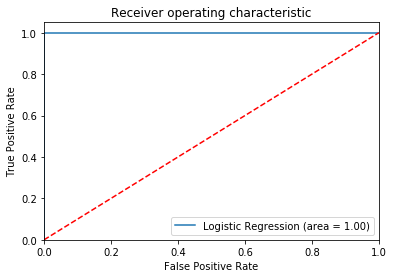

In [131]:
%matplotlib inline

import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [132]:
# Difference between probit model and logistic regression

# https://www.methodsconsultants.com/tutorial/what-is-the-difference-between-logit-and-probit-models/

# Basically are both linear model that has now been made nonlinear. For categorical variables

# The logit model uses something called the cumulative distribution function of the logistic distribution. 
# The probit model uses something called the cumulative distribution function of the standard normal distribution 
# to define f (*). Both functions will take any number and rescale it to fall between 0 and 1. Hence, whatever α + βx equals, 
# it can be transformed by the function to yield a predicted probability. Any function that would return a value between zero 
# and one would do the trick, but there is a deeper theoretical model underpinning logit and probit that requires the function 
# to be based on a probability distribution. The logistic and standard normal cdfs turn out to be convenient mathematically 
# and are programmed into just about any general purpose statistical package.

# Importance of log probabilities and tranformation into cumulative variance

# Probit model paper
# https://economics.umbc.edu/files/2017/01/Hsu-Thomas-Capstone-Final-Paper.pdf
# https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr691.pdf

# Random Forest Model

In [133]:
# Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


No handles with labels found to put in legend.


USDIndex                  0.19
nfci                      0.13
VIX                       0.12
gdpGrowth                 0.09
ManufacturingConfidence   0.07
PeopleOutputPerHour       0.05
CorporateProfits          0.05
GDP                       0.05
HousePriceIndex           0.04
ConsumerSentiment         0.04
T10T3                     0.03
govtToGDP                 0.03
SP500                     0.03
FEDFUNDS                  0.02
USNIM                     0.02
GS10                      0.01
uRate                     0.01
dtype: float64


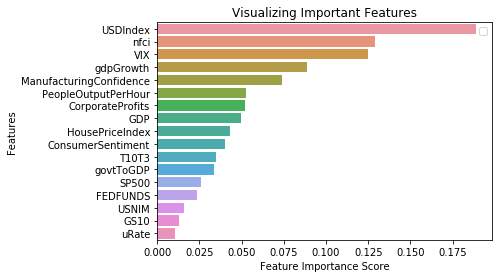

In [134]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_imp)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# LSTM Implementation

In [150]:
# Get the 10 most predictive features to match up against this dataset using principal component analysis
# Dimensionality reduction

lstmData = laggedData

# print(lstmData.head())

lstmBearMarket = lstmData[['Date', 'bearMarket']]

lstmMarketData = lstmData.loc[:, lstmData.columns != 'bearMarket']

# print(lstmMarketData.head())
# print(lstmBearMarket.head())

# lstmBearMarket.to_csv('lstmBearMarket.csv', encoding='utf-8', index=False)

# lstmMarketData.to_csv('lstmMarketData.csv', encoding='utf-8', index=False)

In [171]:
lstmMarketData.head()

,Date,GDP,SP500,T10T3,uRate,nfci,USDIndex,ManufacturingConfidence,HousePriceIndex,ConsumerSentiment,PeopleOutputPerHour,GS10,FEDFUNDS,USNIM,govtToGDP,CorporateProfits,VIX,gdpGrowth
0,10/1/1990,6004.73,314.94,1.34,5.90,0.25,86.27,97.85,165.20,63.90,48.05,8.72,8.11,4.03,0.33,413.23,28.06,-1.00
1,1/1/1991,6035.18,326.45,1.31,6.40,0.37,84.88,97.13,166.57,66.80,47.93,8.09,6.91,4.08,0.33,423.45,27.93,-0.50
2,4/1/1991,6126.86,371.30,2.13,6.70,-0.20,90.26,97.82,167.70,81.80,48.45,8.04,5.91,4.11,0.34,425.45,17.42,-0.10
3,7/1/1991,6205.94,377.92,2.50,6.80,-0.36,92.88,99.58,167.99,82.90,49.31,8.27,5.82,4.16,0.34,431.73,18.64,1.20
4,10/1/1991,6264.54,389.20,2.20,7.00,-0.49,88.23,99.78,170.35,78.30,49.62,7.53,5.21,4.20,0.34,436.64,14.81,2.90


In [152]:
keepLSTMcolumns = ['GDP', 'SP500', 'T10T3', 'uRate',
       'nfci', 'USDIndex', 'ManufacturingConfidence',
       'HousePriceIndex', 'ConsumerSentiment', 'PeopleOutputPerHour', 'GS10', 'FEDFUNDS',
       'USNIM', 'govtToGDP', 'CorporateProfits', 'VIX', 'gdpGrowth']

dates = lstmMarketData['Date']

from sklearn.preprocessing import StandardScaler

lstmMarketDataFiltered = lstmMarketData[keepLSTMcolumns]

pcaTestLSTMdata = StandardScaler().fit_transform(lstmMarketDataFiltered)

cov_pcaTestLSTMdata = np.cov(pcaTestLSTMdata.T)

print(cov_pcaTestLSTMdata)

[[ 1.00892857  0.90868789 -0.03053199  0.00355173  0.0279198  -0.35487379
   0.24681308  0.94547823 -0.1278661   0.96518047 -0.92324027 -0.72663835
  -0.92989865  0.27714806  0.96115279 -0.10379974 -0.26037152]
 [ 0.90868789  1.00892857 -0.2505253  -0.35522108 -0.15928924 -0.04908938
   0.30485733  0.83535578  0.22900495  0.79103153 -0.75952433 -0.47587705
  -0.81357342 -0.06239377  0.81135373 -0.19877927 -0.04704081]
 [-0.03053199 -0.2505253   1.00892857  0.68255342  0.09541641 -0.20432241
   0.22135905 -0.1101962  -0.4695918   0.03752637 -0.08364631 -0.6001157
   0.11330857  0.58156975 -0.04019794  0.03631005 -0.11056144]
 [ 0.00355173 -0.35522108  0.68255342  1.00892857  0.32562935 -0.58362899
  -0.03437209 -0.09346616 -0.75627972  0.14499863 -0.17127255 -0.5065807
   0.04238741  0.86976056  0.10220533  0.17838999 -0.27930419]
 [ 0.0279198  -0.15928924  0.09541641  0.32562935  1.00892857 -0.20679753
  -0.62310799  0.0827084  -0.56086152  0.12059865 -0.09390466 -0.11242665
  -0.16752

In [153]:
eig_vals_LSTMdata, eig_vecs_LSTMdata = np.linalg.eig(cov_pcaTestLSTMdata)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs_LSTMdata = [(np.abs(eig_vals_LSTMdata[i]), eig_vecs_LSTMdata[:,i]) for i in range(len(eig_vals_LSTMdata))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_LSTMdata.sort(key=lambda x: x[0], reverse=True)

valSum_LSTM = 0

for i in range(0, len(eig_vals_LSTMdata)):
    valSum_LSTM += eig_vals_LSTMdata[i]
print(valSum_LSTM)

17.151785714285733


In [154]:
count = 0
keepLSTMfeatures = []

for i in range(0, len(eig_vals_LSTMdata)):
    print(lstmMarketDataFiltered.columns[i], ":", eig_vals_LSTMdata[i] / valSum_LSTM)
    cumulativeVariance = cumulativeVariance + (eig_vals_LSTMdata[i] / valSum_LSTM)
    # print(cumulativeVariance)
    if count < 10:
        keepLSTMfeatures.append(lstmMarketDataFiltered.columns[i])
    count = count + 1
print(keepLSTMfeatures)

GDP : 0.4368776943828726
SP500 : 0.24772328685503345
T10T3 : 0.1469420804367009
uRate : 0.06267391963252851
nfci : 0.035249268036114494
USDIndex : 0.022118570728317168
ManufacturingConfidence : 0.013120204537104847
HousePriceIndex : 0.010058024561598005
ConsumerSentiment : 0.007400926914028026
PeopleOutputPerHour : 8.567704443637325e-05
GS10 : 0.00022366492623716798
FEDFUNDS : 0.0005860960819606574
USNIM : 0.0013132751371877551
govtToGDP : 0.0023093696454166263
CorporateProfits : 0.005454332619810056
VIX : 0.0037042845633289403
gdpGrowth : 0.004159323897324627
['GDP', 'SP500', 'T10T3', 'uRate', 'nfci', 'USDIndex', 'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment', 'PeopleOutputPerHour']


In [155]:
updatedLSTMmarketDataFiltered = lstmMarketDataFiltered[keepLSTMfeatures]
updatedLSTMmarketDataFiltered['Date'] = dates
cols = list(updatedLSTMmarketDataFiltered.columns)
a, b = cols.index('Date'), cols.index('GDP')
cols[b], cols[a] = cols[a], cols[b]
updatedLSTMmarketDataFiltered = updatedLSTMmarketDataFiltered[cols]
updatedLSTMmarketDataFiltered['Recession State'] = lstmBearMarket['bearMarket']
print(updatedLSTMmarketDataFiltered.head())

        Date  SP500  T10T3  uRate  nfci  USDIndex  ManufacturingConfidence  \
0  10/1/1990 314.94   1.34   5.90  0.25     86.27                    97.85   
1   1/1/1991 326.45   1.31   6.40  0.37     84.88                    97.13   
2   4/1/1991 371.30   2.13   6.70 -0.20     90.26                    97.82   
3   7/1/1991 377.92   2.50   6.80 -0.36     92.88                    99.58   
4  10/1/1991 389.20   2.20   7.00 -0.49     88.23                    99.78   

   HousePriceIndex  ConsumerSentiment  PeopleOutputPerHour     GDP  \
0           165.20              63.90                48.05 6004.73   
1           166.57              66.80                47.93 6035.18   
2           167.70              81.80                48.45 6126.86   
3           167.99              82.90                49.31 6205.94   
4           170.35              78.30                49.62 6264.54   

   Recession State  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [159]:
# updatedLSTMmarketDataFiltered.to_csv('updatedLSTMmarketDataFiltered.csv', encoding='utf-8', index=False)

Begin training!
Epoch 1/3
37/37 [==============================] - 88s 2s/step - loss: 0.2038 - acc: 1.0000
Epoch 2/3
37/37 [==============================] - 1s 40ms/step - loss: 0.0041 - acc: 1.0000
Epoch 3/3
37/37 [==============================] - 2s 43ms/step - loss: 6.9567e-04 - acc: 1.0000

Evaluating!
Parameters
Horizon: 1
Timesteps: 1
Variables: [0, 1, 4]
Hidden layer size: 300
Batch Size: 3
Epochs: 3


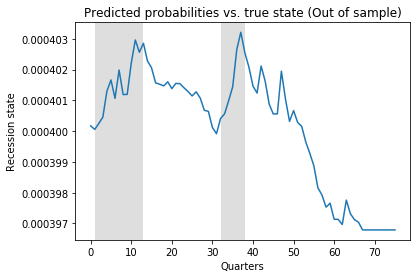

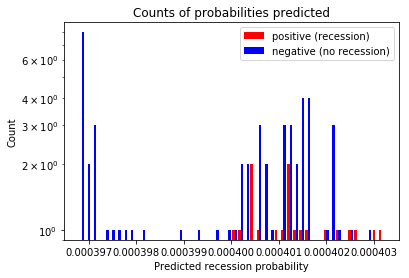

In [283]:
# This code is from https://github.com/XianhaiC/Recession-Prediction-LSTM

# imports
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import h5py
import math
import os.path
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

#class that creates a singular LSTM with given parameters
class Prediction:
    
    ##Constructor##
    def __init__(self, n_hidden, n_batch_size, n_epochs, 
                 n_dropout, d_horizon, d_timesteps, 
                 d_test_samples, d_parameter_list, d_shuffled, 
                 data_x, data_y):
        #the size of the hidden layer
        self.n_hidden = n_hidden
        
        #the batch size used in training
        self.n_batch_size = n_batch_size
        
        #the number of training epochs
        self.n_epochs = n_epochs
        
        #the dropout rate during training
        self.n_dropout = n_dropout
        
        #the number of months in the future for which a recession prediction is to be made
        self.d_horizon = d_horizon
        
        #the number of months of data comprising a case
        self.d_timesteps = d_timesteps
        
        #the proportion of the data set to be used as the test data
        self.d_test_samples = d_test_samples
        
        #the specified market variables with which the LSTM will train and test with
        self.d_parameter_list = d_parameter_list
        
        #indicates whether or not the LSTM will be trained with data that is randomly sampled from the complete data set
        self.d_shuffled = d_shuffled
        
        #the initial raw market variable data set
        self.data_x = data_x
        
        #the initial raw recession state data set
        self.data_y = data_y.astype('float32')
        
        #prepare the data sets for training and testing
        self.filter_data()
        self.create_datasets()
        
    ##Filters the market variable data set to only contain the variables specified by the parameter list##
    def filter_data(self):
        #index and coloums for the dataframe
        column = np.array(['SP500', 'T10T3', 'uRate', 
                       'nfci', 'USDIndex', 'ManufacturingConfidence', 
                       'HousePriceIndex', 'ConsumerSentiment', 'PeopleOutputPerHour', 
                       'GDP', 'Recession State'])
        
        data_x_filtered = pd.DataFrame(self.data_x.values[:, self.d_parameter_list], columns=column[self.d_parameter_list])
        
        self.data_x = data_x_filtered

    def create_datasets(self):
        #the dimensions of the input and output fed into and retrieved from the LSTM
        inputDim = len(self.data_x.values[0])
        outputDim = len(self.data_y.values[0])
        
        #modifies the x dataset into the shape (case, timestep, input value)
        self.data_x_mod = np.array([[self.data_x.values[timestep] for timestep in np.arange(case, case + self.d_timesteps)] for case in np.arange(len(self.data_x.values) - self.d_timesteps + 1)])
        #modifies the y dataset into the shape (case, output value)
        self.data_y_mod = np.array(self.data_y.values[self.d_horizon + self.d_timesteps - 1: len(self.data_x.values) + self.d_horizon])

        #the index at which the datasets are split into training and testing sets
        split_index = int(len(self.data_x_mod) * self.d_test_samples)
        
        #the row indices for the recession state datafram split for training and testing sets
        rng_y = self.data_y.index[self.d_horizon + self.d_timesteps - 1: len(self.data_x.values) + self.d_horizon]
        rng_train_y = rng_y[:split_index]
        rng_test_y = rng_y[split_index:]

        #shuffles random samples of data for both training and testing sets if required
        train_x = self.data_x_mod[:split_index]
        train_y = self.data_y_mod[:split_index]

        test_x = self.data_x_mod[split_index:]
        test_y = self.data_y_mod[split_index:]
        if (self.d_shuffled == True):
            data_x_shuffled, data_y_shuffled = self.unison_shuffled_copies(self.data_x_mod, self.data_y_mod)
            train_x = data_x_shuffled[:split_index]
            train_y = data_y_shuffled[:split_index]

            test_x = data_x_shuffled[split_index:]
            test_y = data_y_shuffled[split_index:]
        
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.rng_train_y = rng_train_y
        self.rng_test_y = rng_test_y
        
    ##Shuffles two vectors in unison, where each paired index stays paired. Only their paired positions change##
    def unison_shuffled_copies(selfm, a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]
    
    ##Initiates and trains an LSTM with given parameters##
    def train_LSTM(self):
        #initiate LSTM
        #two hidden layers are used
        self.model = Sequential()
        self.model.add(LSTM(
            self.n_hidden, 
            input_shape=(self.d_timesteps, len(self.d_parameter_list)), 
            return_sequences=True))
        self.model.add(Dropout(self.n_dropout))
        self.model.add(LSTM(self.n_hidden, return_sequences=False))
        self.model.add(Dropout(self.n_dropout))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        print("Begin training!")
        
        #train LSTM
        self.model.fit(self.train_x, self.train_y, 
                       epochs=self.n_epochs, batch_size=self.n_batch_size, verbose=1)
        print("")
    
    ##Evaluates the ROC and ROC area for the trained LSTM##
    def evaluate_LSTM(self):
        print("Evaluating!")
        
        if (self.d_shuffled):
            self.e_prediction_mod = self.model.predict(self.data_x_mod, batch_size=1, verbose=0)
        
        #evaluates the test data
        self.e_prediction = self.model.predict(self.test_x, batch_size=1, verbose=0)
        self.e_positive_negative = [
            [self.e_prediction[i, 0] for i in range(len(self.test_y)) if self.test_y[i, 0] == 1], 
            [self.e_prediction[i, 0] for i in range(len(self.test_y)) if self.test_y[i, 0] == 0]]
        
        # self.e_fpr, self.e_tpr, self.e_threshold = metrics.roc_curve(self.test_y, self.e_prediction)
        # self.e_roc_auc = metrics.auc(self.e_fpr, self.e_tpr)
        
    ##modifies plot##
    def add_bars(self, data):
        start = 0
        end = 0
        for i, prediction in enumerate(data):
            if (prediction[0] == 1):
                if (i == 0):
                    start = i
                elif (i == len(data) - 1):
                    if (data[i - 1, 0] != 1):
                        start = i
                        end = i + 1
                        plt.axvspan(start, end, color='0.75', alpha=0.5, lw=0)
                    else:
                        end = i + 1
                        plt.axvspan(start, end, color='0.75', alpha=0.5, lw=0)
                elif (data[i - 1, 0] != 1):
                    start = i
        
            if (prediction[0] == 0):
                if (data[i - 1, 0] == 1):
                    end = i
                    plt.axvspan(start, end, color='0.75', alpha=0.5, lw=0)
                    
    ##Displays the evaluations on the test data    
    def display_results(self):
        print("Parameters")
        print("Horizon: " + str(self.d_horizon))
        print("Timesteps: " + str(self.d_timesteps))
        print("Variables: " + str(self.d_parameter_list))
        print("Hidden layer size: " + str(self.n_hidden))
        print("Batch Size: " + str(self.n_batch_size))
        print("Epochs: " + str(self.n_epochs))
        
        plt.figure(1)
        if (not self.d_shuffled):
            plt.title('Predicted probabilities vs. true state (Out of sample)')
            plt.plot(self.e_prediction)
            self.add_bars(self.test_y)
        
        else:
            plt.title('Predicted probabilities vs true state (In and out of sample)')
            plt.plot(self.e_prediction_mod)
            self.add_bars(self.data_y_mod)
            
        plt.xlabel("Quarters")
        plt.ylabel("Recession state")
        plt.show()
        
        plt.figure(2)
        plt.title('Counts of probabilities predicted')
        plt.hist(
            self.e_positive_negative, 50, 
            histtype='bar', color=['red', 'blue'], 
            label=['positive (recession)', 'negative (no recession)'], 
            log=True)
        plt.xlabel("Predicted recession probability")
        plt.ylabel("Count")
        plt.legend()
        plt.show()
        
        # plt.figure(3)
        # plt.title('Receiver operating characteristic')
        # lw = 2
        # plt.plot(self.e_fpr, self.e_tpr, color='darkorange',
        #          lw=lw, label='ROC curve (area = %0.2f)' % self.e_roc_auc)
        # plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        # plt.xlim([0.0, 1.0])
        # plt.ylim([0.0, 1.05])
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.legend(loc='lower right')
        # plt.show()
 
    ##saves trained LSTM data to local folder##
    def save_LSTM(self, path):
        self.model.save(path)
    
    ##loads local LSTM data##
    def load_LSTM(self, path):
        self.model = load_model(path)
        
def parse_LSTM_data():
    #read in data
    data_x_raw = pd.read_csv('updatedLSTMmarketDataFiltered.csv')
    data_y_raw = pd.read_csv('lstmBearMarket.csv')

        #create row and column headers
    column = np.array(['SP500', 'T10T3', 'uRate', 
                       'nfci', 'USDIndex', 'ManufacturingConfidence', 
                       'HousePriceIndex', 'ConsumerSentiment', 'PeopleOutputPerHour', 
                       'GDP', 'Recession State'])

        #filter values
    data_x_values = np.array(data_x_raw.values)
    data_y_values = np.array(data_y_raw.values)
    data_x_values = np.delete(data_x_values, (0), axis=1)
    data_y_values = np.delete(data_y_values, (0), axis=1)

        #create filtered dataframe
    data_x = pd.DataFrame(data_x_values, columns=column[:10])
    data_y = pd.DataFrame(data_y_values, columns=[column[10]])

    return data_x, data_y 
        #list of predictions
    
if __name__ == "__main__":    
    # the size of the hidden layer
    # the batch size used in training
    # the number of training epochs
    # the dropout rate during training
    # the number of quarters in the future for which a recession prediction is to be made
    # the number of quarters of data comprising a case
    # the proportion of the data set to be used as the test data
    # the specified market variables with which the LSTM will train and test with
    # indicates whether or not the LSTM will be trained with data that is randomly sampled from the complete data set
    # the initial raw market variable data set
    # the initial raw recession state data set        
    data_x, data_y = parse_LSTM_data()
    # pred = Prediction(300, 3, 3, 0.33, 1, 1, .25, [0, 1, 2, 3], False, data_x, data_y,)
    # pred = Prediction(300, 3, 3, 0.33, 2, 2, .5, [0, 1, 2, 3, 4, 5, 6, 7], False, data_x, data_y,)
    # pred = Prediction(300, 3, 3, 0.33, 1, 2, .5, [0, 1, 2, 3], False, data_x, data_y,)
    pred = Prediction(300, 3, 3, 0.15, 1, 1, .33, [0, 1, 4], False, data_x, data_y,)    
    pred.train_LSTM()
    pred.evaluate_LSTM()
    pred.display_results()

# KNN Algorithm

In [92]:
dataCorrelations = nnData.corr().unstack().sort_values()
dataCorrelations['bearMarket']

ManufacturingConfidence   -0.503642
uRate                     -0.029143
T10T3                      0.087757
USDIndex                   0.368988
nfci                       0.550893
bearMarket                 1.000000
dtype: float64

In [93]:
getData = ['nfci', 'USDIndex', 'bearMarket']

KNNdata = nnData[getData] 

In [94]:
import numpy as np
from sklearn.metrics import confusion_matrix

def recallCalc(matrix):
    tp = matrix[1][1] 
    fn = matrix[0][1] 
    return(np.round(tp/(tp+fn), 5))

def precisionCalc(matrix): 
    tp = matrix[1][1] 
    fp = matrix[0][0] 
    return(np.round(tp/(tp+fp), 5))

def fScore(precision, recall):
    return(np.round(2 * (precision * recall) / (precision + recall), 5))

def falsePositiveRate_(matrix):
    fp = matrix[0][1] 
    tn = matrix[0][0] 
    return(np.round(fp/(fp+tn), 5))

def truePositiveRate_(matrix):
    tp = matrix[1][1] 
    fn = matrix[1][0] 
    return(np.round(tp/(tp+fn), 5))

def accuracy(actual, pred):
    return(np.round(  (pred == actual).sum()/len(actual)  , 5))

def thresholdPredData(threshold, pred):
    predMal = pred
    for i in range(len(predMal)):
        if((threshold == 1.0) & (predMal[i].astype(float) == 1.0)):
            predMal[i] = 0.0
        elif((threshold == 0.0) & (predMal[i].astype(float) == 0.0)):
            predMal[i] = 1.0
        elif(predMal[i] > threshold):
            predMal[i] = 1
        else:
            predMal[i] = 0
    return(predMal.astype(int))

In [95]:
def analytics(fitModel, xv_test, yv_test):
    predMal = fitModel.predict_proba(xv_test)[:, 1]
    actual = yv_test
    w, h = 5, 11;
    additionalData = [[0 for x in range(w)] for y in range(h)] 
    thresholds = np.round(np.linspace(0, 1, 11),6)
    fpr = []
    tpr = []
    for i in thresholds:
        predMal = fitModel.predict_proba(xv_test)[:, 1]
        pred = thresholdPredData(i, predMal)
        c_matrix = confusion_matrix(actual, pred)
        tpr.append(truePositiveRate_(c_matrix))
        fpr.append(falsePositiveRate_(c_matrix))
        additionalData[int(i * 10)][0] = i
        additionalData[int(i * 10)][1] = precisionCalc(c_matrix)
        additionalData[int(i * 10)][2] = recallCalc(c_matrix)
        additionalData[int(i * 10)][3] = accuracy(actual, pred)
        additionalData[int(i * 10)][4] = fScore(precisionCalc(c_matrix), recallCalc(c_matrix))
        print(c_matrix)
    additionalData = pd.DataFrame(data=additionalData, columns=['Threshold', 'Precision', 'Recall', 'Accuracy', 'fScore'])
    print(additionalData)
    df = pd.DataFrame({'threshold':thresholds, 'fpr':fpr, 'tpr':tpr})
    plt.plot(df.fpr, df.tpr)
    plt.plot([0, 90], [0, 90], '-')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.show()
    print(df)

In [178]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def predictions(train_features, test_features, train_outcome, test_outcome): 
    w, h = 5, 1;
    KNNresults = [[0 for x in range(w)] for y in range(h)] 
    KNNdatas = pd.DataFrame(KNNresults)
    KNNdatas.columns = ['a', 'b', 'c', 'd', 'e']

    for K in range(0, 5):
        K = K+1
        # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        # ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        for weights in ['uniform', 'distance']:
            # ‘ball_tree’ will use BallTree, ‘kd_tree’ will use KDTree, ‘brute’ will use a brute-force search.
            for algo in ['ball_tree', 'kd_tree', 'brute']:
            # manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
                for powerDistance in [1,2]:
                    model = KNeighborsClassifier(n_neighbors = K, weights=weights, algorithm=algo, p=powerDistance)
                    model.fit(train_features, train_outcome)  #fit the model
                    pred=model.predict(test_features) #make prediction on test set
                    accuracy = accuracy_score(test_outcome, pred)
                    print([[K, weights, algo, powerDistance, accuracy]])
                    thisList=[[K, weights, algo, powerDistance, accuracy]]
                    KNNdatas = KNNdatas.append((thisList))      
    KNNdatas.drop(KNNdatas.iloc[:, 1:5], inplace=True, axis=1)
    KNNdatas.drop(["a"], axis = 1, inplace = True)
    KNNdatas = KNNdatas.reset_index(drop=True)
    KNNdatas = KNNdatas.drop(KNNdatas.index[0])
    KNNdatas.columns = ['K', 'weights', 'algo', 'powerDistance', 'accuracy'] 
    print(KNNdatas)
    #print(KNNdatas['accuracy'].max())
    #print(KNNdatas['accuracy'].argmax())
    bestData = KNNdatas.iloc[KNNdatas['accuracy'].argmax() - 1]
    #print(bestData)
    from sklearn.metrics import confusion_matrix
    model = KNeighborsClassifier(n_neighbors = int(bestData.K), weights=bestData.weights, algorithm=bestData.algo, p=bestData.powerDistance)
    model.fit(train_features, train_outcome)  #fit the model
    # This is where we could do the threshold calculation
    analytics(model.fit(train_features, train_outcome), test_features, test_outcome)
    #gridshow(model, train_features, train_outcome, test_features, test_outcome, nGrid=100)
    pred=model.predict(test_features) #make prediction on test set
    #print(pred)
    accuracy = accuracy_score(test_outcome, pred)
    #print(accuracy)
    confusion_matrix(test_outcome, pred)
    return pred

[[1, 'uniform', 'ball_tree', 1, 0.9473684210526315]]
[[1, 'uniform', 'ball_tree', 2, 0.9473684210526315]]
[[1, 'uniform', 'kd_tree', 1, 0.9473684210526315]]
[[1, 'uniform', 'kd_tree', 2, 0.9473684210526315]]
[[1, 'uniform', 'brute', 1, 0.9473684210526315]]
[[1, 'uniform', 'brute', 2, 0.9473684210526315]]
[[1, 'distance', 'ball_tree', 1, 0.9473684210526315]]
[[1, 'distance', 'ball_tree', 2, 0.9473684210526315]]
[[1, 'distance', 'kd_tree', 1, 0.9473684210526315]]
[[1, 'distance', 'kd_tree', 2, 0.9473684210526315]]
[[1, 'distance', 'brute', 1, 0.9473684210526315]]
[[1, 'distance', 'brute', 2, 0.9473684210526315]]

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[2, 'uniform', 'ball_tree', 1, 0.8947368421052632]]
[[2, 'uniform', 'ball_tree', 2, 0.8947368421052632]]
[[2, 'uniform', 'kd_tree', 1, 0.8947368421052632]]
[[2, 'uniform', 'kd_tree', 2, 0.8947368421052632]]
[[2, 'uniform', 'brute', 1, 0.8947368421052632]]
[[2, 'uniform', 'brute', 2, 0.8947368421052632]]
[[2, 'distance', 'ball_tree', 1, 0.9473684210526315]]
[[2, 'distance', 'ball_tree', 2, 0.9473684210526315]]
[[2, 'distance', 'kd_tree', 1, 0.9473684210526315]]
[[2, 'distance', 'kd_tree', 2, 0.9473684210526315]]

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[2, 'distance', 'brute', 1, 0.9473684210526315]]
[[2, 'distance', 'brute', 2, 0.9473684210526315]]
[[3, 'uniform', 'ball_tree', 1, 0.8947368421052632]]
[[3, 'uniform', 'ball_tree', 2, 0.8947368421052632]]
[[3, 'uniform', 'kd_tree', 1, 0.8947368421052632]]
[[3, 'uniform', 'kd_tree', 2, 0.8947368421052632]]
[[3, 'uniform', 'brute', 1, 0.8947368421052632]]
[[3, 'uniform', 'brute', 2, 0.8947368421052632]]
[[3, 'distance', 'ball_tree', 1, 0.9210526315789473]]
[[3, 'distance', 'ball_tree', 2, 0.9210526315789473]]
[[3, 'distance', 'kd_tree', 1, 0.9210526315789473]]

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[3, 'distance', 'kd_tree', 2, 0.9210526315789473]]
[[3, 'distance', 'brute', 1, 0.9210526315789473]]
[[3, 'distance', 'brute', 2, 0.9210526315789473]]
[[4, 'uniform', 'ball_tree', 1, 0.8947368421052632]]
[[4, 'uniform', 'ball_tree', 2, 0.8947368421052632]]
[[4, 'uniform', 'kd_tree', 1, 0.8947368421052632]]
[[4, 'uniform', 'kd_tree', 2, 0.8947368421052632]]
[[4, 'uniform', 'brute', 1, 0.8947368421052632]]
[[4, 'uniform', 'brute', 2, 0.8947368421052632]]
[[4, 'distance', 'ball_tree', 1, 0.9210526315789473]]
[[4, 'distance', 'ball_tree', 2, 0.9210526315789473]]


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht

[[4, 'distance', 'kd_tree', 1, 0.9210526315789473]]
[[4, 'distance', 'kd_tree', 2, 0.9210526315789473]]
[[4, 'distance', 'brute', 1, 0.9210526315789473]]
[[4, 'distance', 'brute', 2, 0.9210526315789473]]
[[5, 'uniform', 'ball_tree', 1, 0.8947368421052632]]
[[5, 'uniform', 'ball_tree', 2, 0.8947368421052632]]
[[5, 'uniform', 'kd_tree', 1, 0.8947368421052632]]
[[5, 'uniform', 'kd_tree', 2, 0.8947368421052632]]
[[5, 'uniform', 'brute', 1, 0.8947368421052632]]

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[5, 'uniform', 'brute', 2, 0.8947368421052632]]
[[5, 'distance', 'ball_tree', 1, 0.9210526315789473]]
[[5, 'distance', 'ball_tree', 2, 0.9210526315789473]]
[[5, 'distance', 'kd_tree', 1, 0.9210526315789473]]
[[5, 'distance', 'kd_tree', 2, 0.9210526315789473]]
[[5, 'distance', 'brute', 1, 0.9210526315789473]]
[[5, 'distance', 'brute', 2, 0.9210526315789473]]
      K   weights       algo  powerDistance  accuracy
1  1.00   uniform  ball_tree           1.00      0.95
2  1.00   uniform  ball_tree           2.00      0.95
3  1.00   uniform    kd_tree           1.00      0.95
4  1.00   uniform    kd_tree           2.00      0.95
5  1.00   uniform      brute           1.00      0.95
6  1.00   uniform      brute           2.00      0.95
7  1.00  distance  ball_tree           1.00      0.95
8  1.00  distance  ball_tree           2.00      0.95
9  1.00  distance    kd_tree           1.00      0.95
10 1.00  distance    kd_tree           2.00      0.95
11 1.00  distance      brute           1.00 

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 6  0]]
    Threshold  Precision  Recall  Accuracy  fScore
0        0.00       1.00    0.16      0.16    0.27
1        0.10       0.11    1.00      0.95    0.20
2        0.20       0.11    1.00      0.95    0.20
3        0.30       0.11    1.00      0.95    0.20
4        0.40       0.11    1.00      0.95    0.20
5        0.50       0.11    1.00      0.95    0.20
6        0.60       0.11    1.00      0.95    0.20
7        0.70       0.11    1.00      0.95    0.20
8        0.80       0.11    1.00      0.95    0.20
9        0.90       0.11    1.00      0.95    0.20
10       1.00       0.00     nan      0.84     nan


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


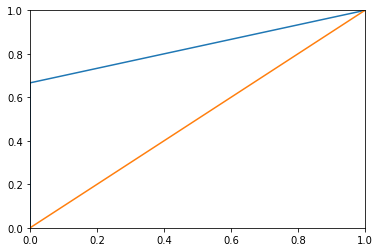

    threshold  fpr  tpr
0        0.00 1.00 1.00
1        0.10 0.00 0.67
2        0.20 0.00 0.67
3        0.30 0.00 0.67
4        0.40 0.00 0.67
5        0.50 0.00 0.67
6        0.60 0.00 0.67
7        0.70 0.00 0.67
8        0.80 0.00 0.67
9        0.90 0.00 0.67
10       1.00 0.00 0.00


In [179]:
from sklearn.model_selection import train_test_split  
train_features, test_features, train_outcome, test_outcome = train_test_split(
KNNdata.drop(['bearMarket'], axis = 1), 
    KNNdata['bearMarket'], 
    test_size = .33, 
    random_state = 7)
predictionsDataframe = pd.DataFrame(test_outcome)
predictionsDataframe['predictions'] = predictions(train_features, test_features, train_outcome, test_outcome)